--- Step 1: Built-in Data Loaded Successfully ---
Dataset shape: (20640, 8)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


--- Step 2: Preprocessing and Splitting Complete ---
Training set size: 16512
Testing set size: 4128

--- Step 3: Model Training Complete ---

--- Step 4: Model Evaluation ---
Root Mean Squared Error (RMSE): 0.7456 (i.e., an average error of $74,558.14)
R-squared (R2) Value: 0.5758

Scatter plot saved as 'actual_vs_predicted_prices_california.png'

--- Analysis Complete ---


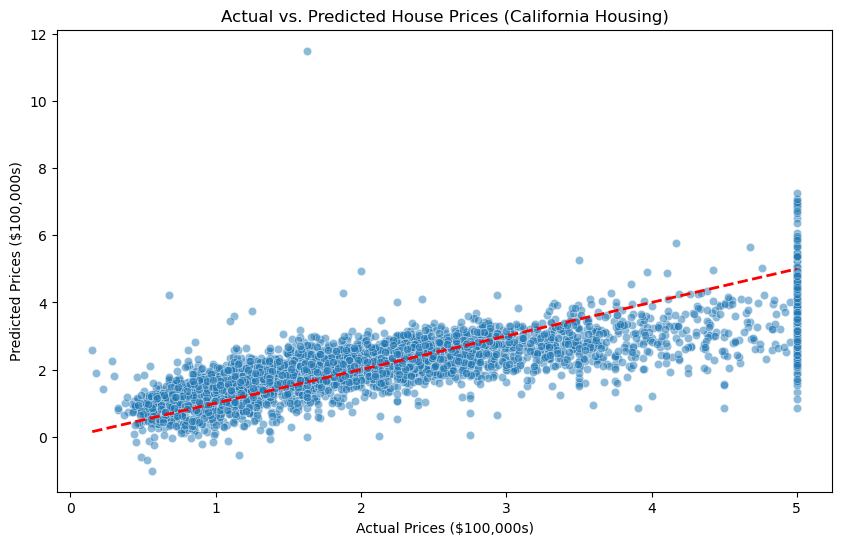

In [3]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # --- Step 1: Load the Built-in Data ---
    # No download needed! This data comes with scikit-learn.
    housing = fetch_california_housing()
    X, y = housing.data, housing.target
    
    print("--- Step 1: Built-in Data Loaded Successfully ---")
    print("Dataset shape:", X.shape)
    print("Features:", housing.feature_names)
    print("\n")

    # --- Step 2: Preprocess and Split the Data ---
    # Since there are no categorical features, we will scale the numerical ones.
    # Scaling helps the linear regression model perform better.
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    print("--- Step 2: Preprocessing and Splitting Complete ---")
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Testing set size: {X_test.shape[0]}\n")

    # --- Step 3: Train the Linear Regression Model ---
    model = LinearRegression()
    model.fit(X_train, y_train)
    print("--- Step 3: Model Training Complete ---\n")

    # --- Step 4: Evaluate the Model ---
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("--- Step 4: Model Evaluation ---")
    # Note: The target price is in units of $100,000.
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f} (i.e., an average error of ${rmse*100000:,.2f})")
    print(f"R-squared (R2) Value: {r2:.4f}")
    
    # Visualize the results: Actual vs. Predicted Prices
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # 45-degree line
    plt.xlabel("Actual Prices ($100,000s)")
    plt.ylabel("Predicted Prices ($100,000s)")
    plt.title("Actual vs. Predicted House Prices (California Housing)")
    plt.savefig('actual_vs_predicted_prices_california.png')
    print("\nScatter plot saved as 'actual_vs_predicted_prices_california.png'")
    print("\n--- Analysis Complete ---")

except Exception as e:
    print(f"An error occurred: {e}")